# Project_7

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from random import sample
from numpy.random import uniform
from math import isnan

In [ ]:
from scipy import stats
from sklearn import metrics
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, SpectralClustering

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import print_dataset_description, print_module_datasets
from bds_courseware import HOMEWORK_DATASETS

In [ ]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Reading and exploring dataset

First I will read the data set and then explore the columns.

In [ ]:
print('Dataset names:', HOMEWORK_DATASETS.keys())
name = 'quake'
df = read_drive_dataset(*HOMEWORK_DATASETS[name])
print(df.head())
print(df.shape)

Dataset names: dict_keys(['suicide_rates', 'car_perfs', 'brain', 'bank', 'air_quality', 'hypothyroid', 'movies', 'bike_sharing_day', 'bike_sharing_hour', 'quake'])
   Focal depth  Latitude  Longitude  Richter
0           33    -52.26      28.30      6.7
1           36     45.53     150.93      5.8
2           57     41.85     142.78      5.8
3           67     29.19     141.15      6.2
4           30    -21.66     169.81      6.0
(2178, 4)


In [ ]:
df.columns

Index(['Focal depth', 'Latitude', 'Longitude', 'Richter'], dtype='object')

#### Data decription:
- Focal depth - the depth below the Earth's surface of the hypocentre of an earthquake;
- Latitude - latitude at which the earthquake occurred;
- Longitude - the longitude at which the earthquake occurred;
- Richter - richter scale, quantitative measure of an earthquake’s magnitude;

## EDA

Checking for missing values and duplicates:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Focal depth  2178 non-null   int64  
 1   Latitude     2178 non-null   float64
 2   Longitude    2178 non-null   float64
 3   Richter      2178 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.2 KB


From here I can conclude that there are not zero values in the dataset. Deleting duplicates (if any):

In [ ]:
df = df.drop_duplicates(ignore_index = True)
df.shape

(2177, 4)

Checking statistical data for an attributes:

In [ ]:
df.describe()

Focal depth     Latitude    Longitude      Richter
count  2177.000000  2177.000000  2177.000000  2177.000000
mean     74.394120     7.942747    54.903785     5.977216
std     116.483644    30.539383   118.901774     0.189463
min       0.000000   -66.490000  -179.960000     5.800000
25%      21.000000   -12.440000   -67.790000     5.800000
50%      39.000000     0.200000   122.110000     5.900000
75%      68.000000    36.480000   146.870000     6.100000
max     656.000000    78.150000   180.000000     6.900000

From the table, I see that the minimum value of the attribute Focal depth is equal to 0. Since it is impossible (it is impossible for an earthquake to happen on the surface of the Earth), and percent there are not many such values (6%), I decide to delete that data:

In [ ]:
df.loc[df['Focal depth'] == 0]

Focal depth  Latitude  Longitude  Richter
5               0     23.09     120.58      6.2
15              0    -44.20     167.96      5.8
92              0     49.88      78.96      5.8
187             0     49.77      78.10      6.1
197             0     49.72      78.07      6.0
...           ...       ...        ...      ...
2113            0     49.85      78.87      6.1
2115            0     49.84      78.69      6.0
2119            0     49.92      78.80      6.0
2152            0     53.21    -166.92      5.8
2157            0    -21.86    -138.92      5.9

[144 rows x 4 columns]

In [ ]:
df['Focal depth'].value_counts()[0]/2177*100

6.614607257694074

In [ ]:
df = df.replace(0, np.nan)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True)

Focal depth  Latitude  Longitude  Richter
0            33.0    -52.26      28.30      6.7
1            36.0     45.53     150.93      5.8
2            57.0     41.85     142.78      5.8
3            67.0     29.19     141.15      6.2
4            30.0    -21.66     169.81      6.0
...           ...       ...        ...      ...
2028         13.0     51.54    -173.11      5.8
2029         97.0    -10.16     161.01      5.9
2030        527.0     27.87     139.51      5.8
2031         51.0     36.43     140.98      6.0
2032         41.0     24.02     122.23      5.8

[2033 rows x 4 columns]

Now I will investigate the distributions of features:

In [ ]:
cols = ['Focal depth', 'Latitude', 'Longitude', 'Richter']

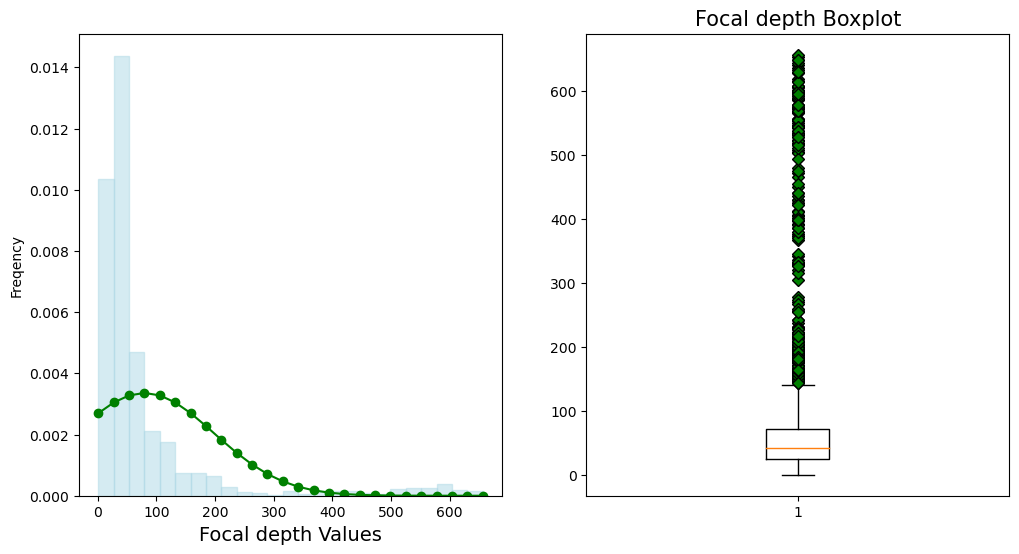

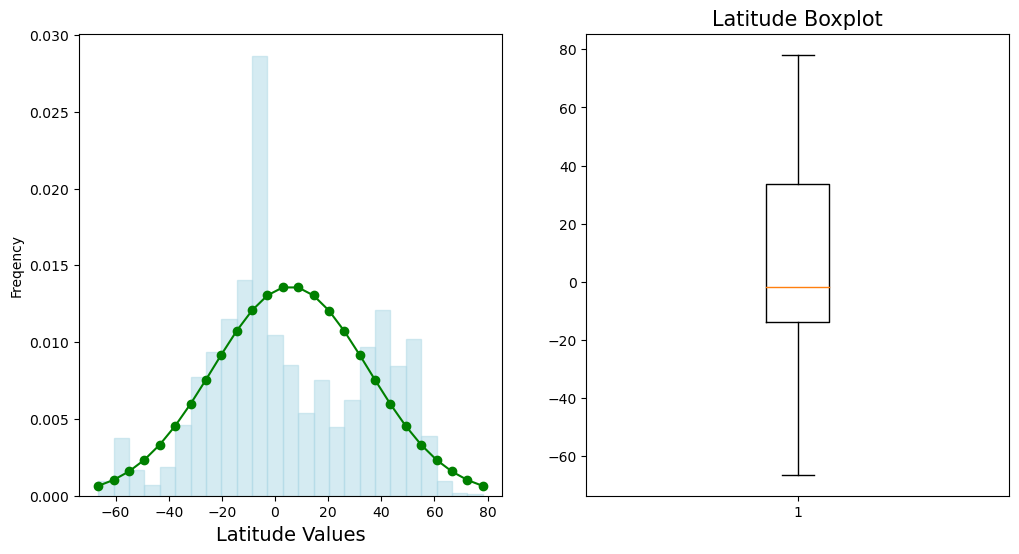

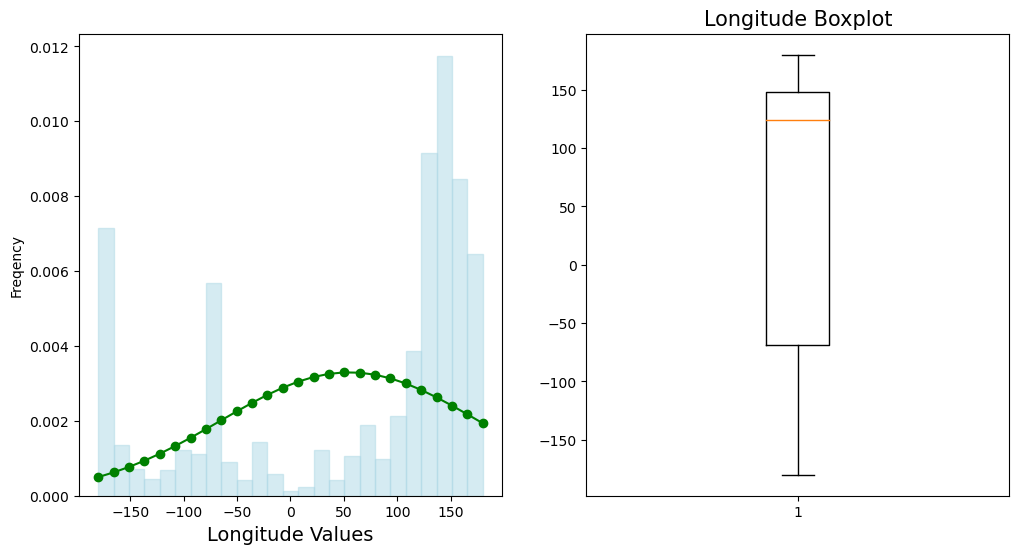

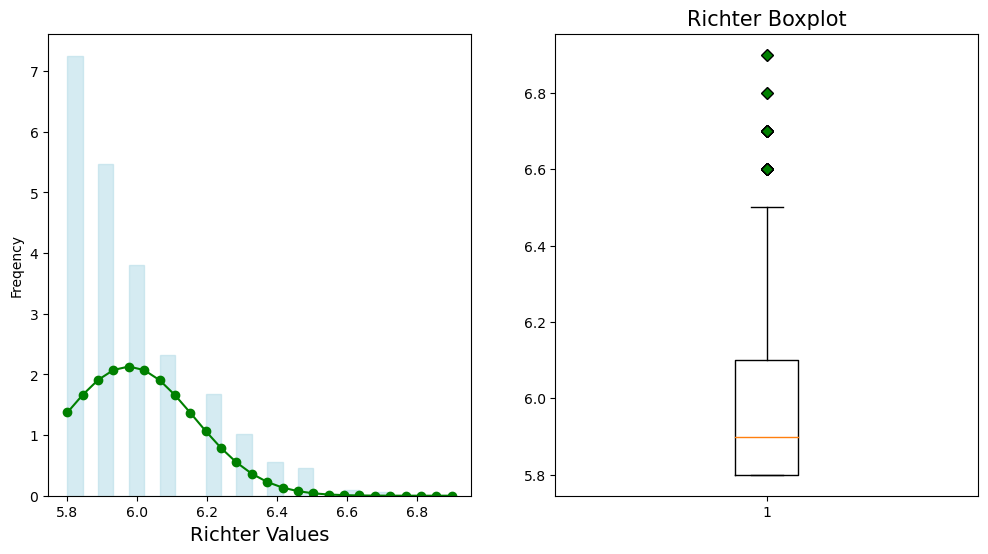

In [ ]:
for column_name in cols:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Distribution Num. Feature
    _, bins, _ = ax1.hist(df[column_name], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'lightblue',
                          ec= 'lightblue' )

    mu, sigma = stats.norm.fit(df[column_name])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('Freqency')
    ax1.set_xlabel(column_name.capitalize() + " Values",fontsize=14)

    # Boxplot
    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(df[column_name],flierprops=green_diamond)

    ax2.set_title(column_name.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="black"))
    plt.show()

From here I can see that the variables do not have a normal distribution, and some of them have outliers. Now, I will present each earthquake on the map (by using 'basemap') using the longitude and latitude of each earthquake.

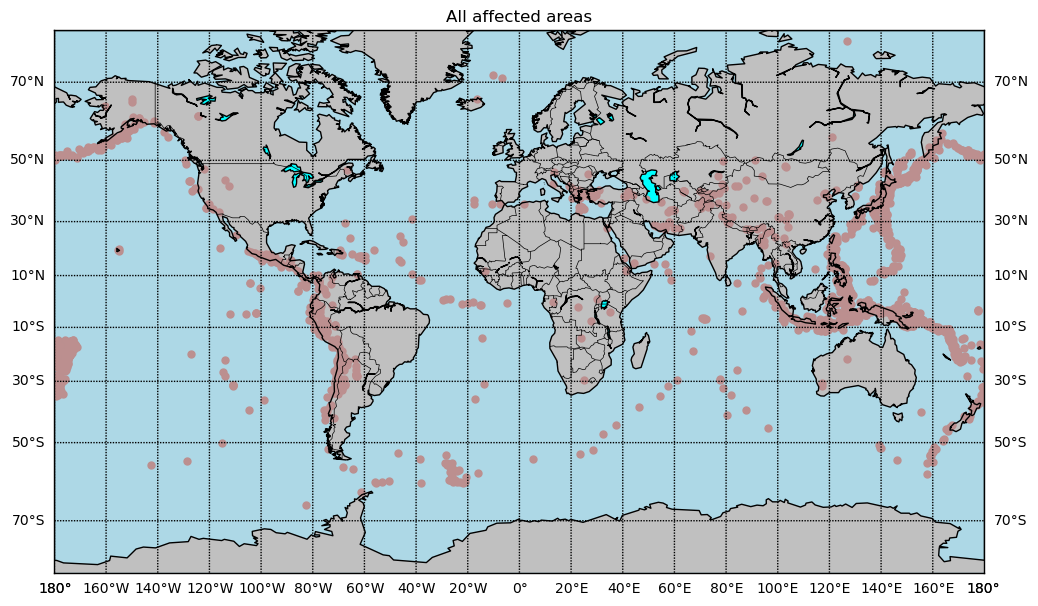

In [ ]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 5, color = 'rosybrown')
m.drawcoastlines()
m.fillcontinents(color='silver',lake_color='aqua')
m.drawmapboundary(fill_color='lightblue')
m.drawcountries()
m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridiansrea
m.drawmeridians(np.arange(0,360,20),labels=[1,1,0,1])
plt.show()

From here I can see that the earthquakes are located in the so far known "rings": Pacific, Mid Atlantic and Mid Continental, which I will later use during feature engineering

Now I will present on the map the distribution of earthquakes according to the Richter scale.

In [ ]:
def plot_map(column):
    fig = px.scatter(df, x='Longitude', y='Latitude',color=column
                     ,color_continuous_scale ='Greens')

    fig.update_layout(title='Earthquake Distribution',
                      title_x=0.5,
                      titlefont_size=16)
    fig.show()

In [ ]:
plot_map("Richter")

From here, I can't see any pattern where the earthquakes are stronger or weaker. I will try with Focal depth.

In [ ]:
plot_map('Focal depth')

From here I can see that some pattern can be established, where earthquakes of greater or lesser depth occur.

### Feature engeenering

Now I will make new attributions for earthquake Richter scale and focal depth according to definitions of them. Depending on the Richter scale, earthquakes are divided into micro, minor, light, moderate, strong, major, great. Depending on the Focal depth,i can devide them on three classes shallow, intermediate, deep. Depending on Latitude and longitude,i can devide them on three rings:Pacific Ring of Fire, Mid Atlantic Ring, Mid Continental. Since I cannot scale the longitude and latitude data, I will use this division based on them.

In [ ]:
RichterType = []
for i in df['Richter'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Micro'
    elif (i<4):
        tempVar = 'Minor'
    elif (i<5):
        tempVar = 'Light'
    elif (i<6):
        tempVar = 'Moderate'
    elif (i<7):
        tempVar = 'Strong'
    elif (i<8):
        tempVar = 'Major'
    else:
        tempVar= 'Great'
    RichterType.append(tempVar)
df['earthquakeCategory'] = RichterType
df.head()

Focal depth  Latitude  Longitude  Richter earthquakeCategory
0         33.0    -52.26      28.30      6.7             Strong
1         36.0     45.53     150.93      5.8           Moderate
2         57.0     41.85     142.78      5.8           Moderate
3         67.0     29.19     141.15      6.2             Strong
4         30.0    -21.66     169.81      6.0             Strong

In [ ]:
areaList = []
for i in df['Longitude'].tolist():
    Area = ''
    if ((i>110 and i<180) or (i>-180 and i<-60)):
        Area = 'Pacific Ring of Fire'
    elif (i>-60 and i<20):
        Area = 'Mid Atlantic Ring'
    else:
        Area = 'Mid Continental'
    areaList.append(Area)
df['Area'] = areaList
df.head()

Focal depth  Latitude  Longitude  Richter earthquakeCategory  \
0         33.0    -52.26      28.30      6.7             Strong   
1         36.0     45.53     150.93      5.8           Moderate   
2         57.0     41.85     142.78      5.8           Moderate   
3         67.0     29.19     141.15      6.2             Strong   
4         30.0    -21.66     169.81      6.0             Strong   

                   Area  
0       Mid Continental  
1  Pacific Ring of Fire  
2  Pacific Ring of Fire  
3  Pacific Ring of Fire  
4  Pacific Ring of Fire

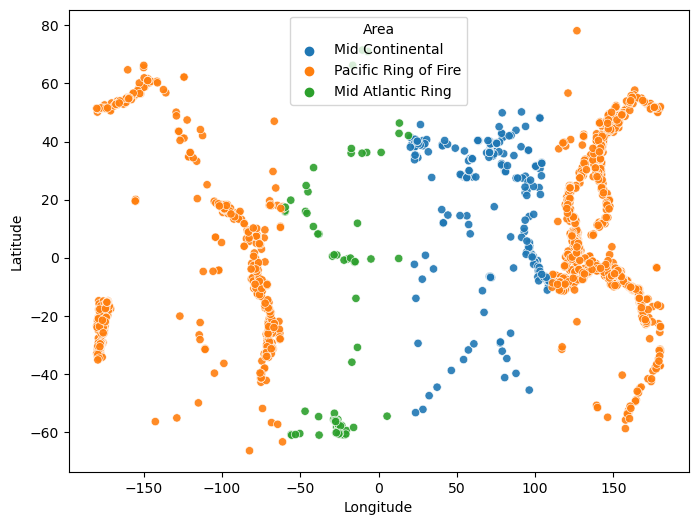

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'Latitude', x = 'Longitude', hue = 'Area', alpha = 0.9)
plt.show()

In [ ]:
tempList = []
for i in df['Focal depth'].tolist():
    tempVar = ''
    if (i<71):
        tempVar = 'Shallow'
    elif (i<301):
        tempVar = 'Intermediate'
    else:
        tempVar = 'Deep'
    tempList.append(tempVar)
df['depthCategory'] = tempList
df.head()

Focal depth  Latitude  Longitude  Richter earthquakeCategory  \
0         33.0    -52.26      28.30      6.7             Strong   
1         36.0     45.53     150.93      5.8           Moderate   
2         57.0     41.85     142.78      5.8           Moderate   
3         67.0     29.19     141.15      6.2             Strong   
4         30.0    -21.66     169.81      6.0             Strong   

                   Area depthCategory  
0       Mid Continental       Shallow  
1  Pacific Ring of Fire       Shallow  
2  Pacific Ring of Fire       Shallow  
3  Pacific Ring of Fire       Shallow  
4  Pacific Ring of Fire       Shallow

I will now explore these two attributes.

In [ ]:
data_visualisation=df

I delete the latitude and longitude columns.

In [ ]:
catf = ['earthquakeCategory', 'depthCategory','Area']

Now I will look for some patterns in the new features.

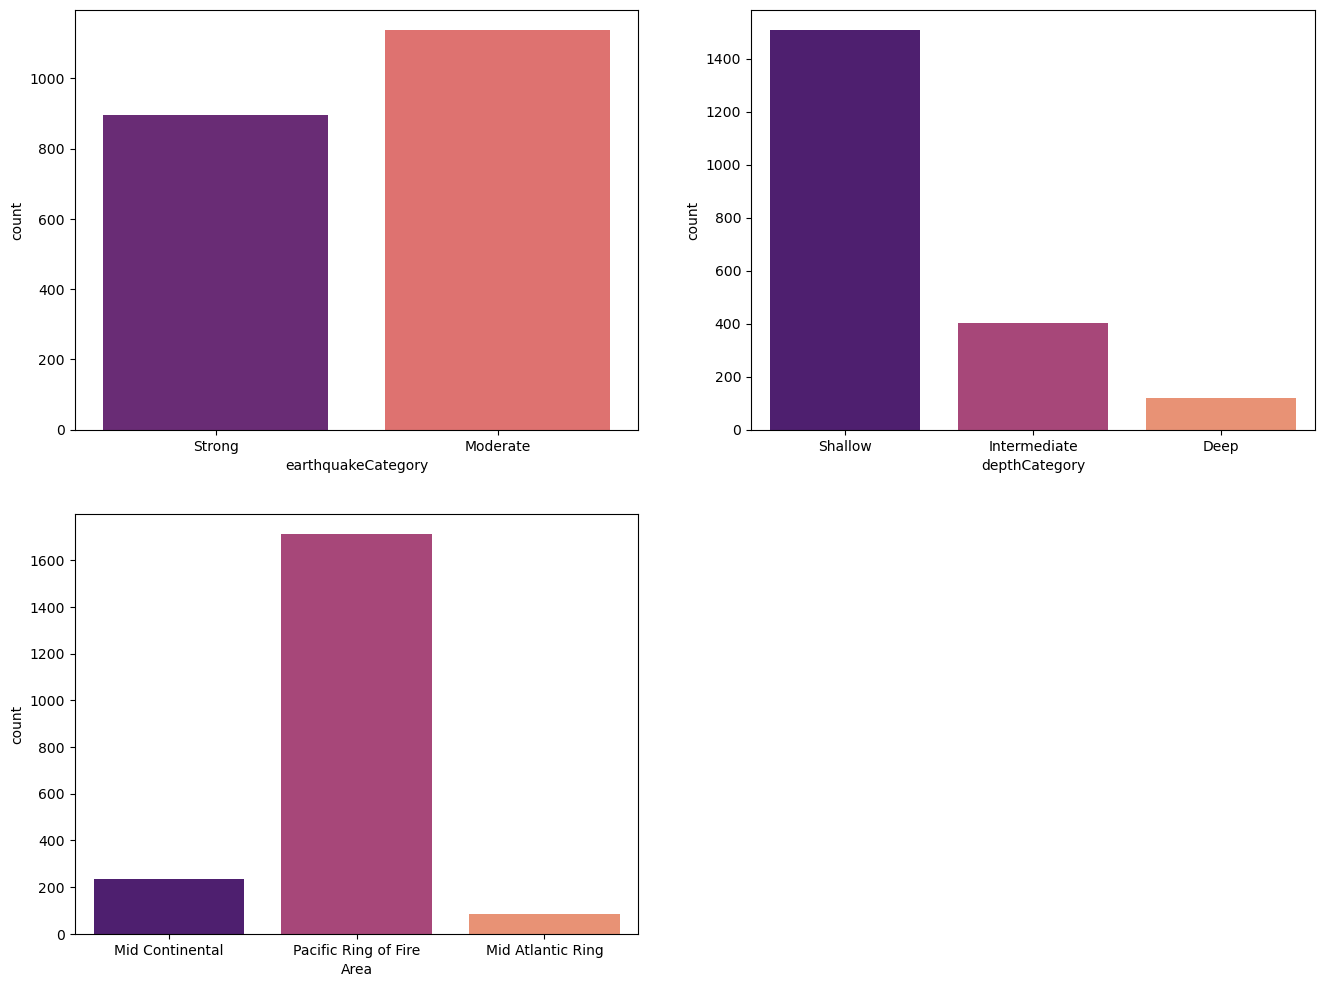

In [ ]:
plt.figure(figsize = (16,12))
subplot = 1
for i in catf:
    plt.subplot(2,2,subplot)
    sns.countplot(data = df, x = i, palette = 'magma')
    subplot = subplot + 1

plt.show()

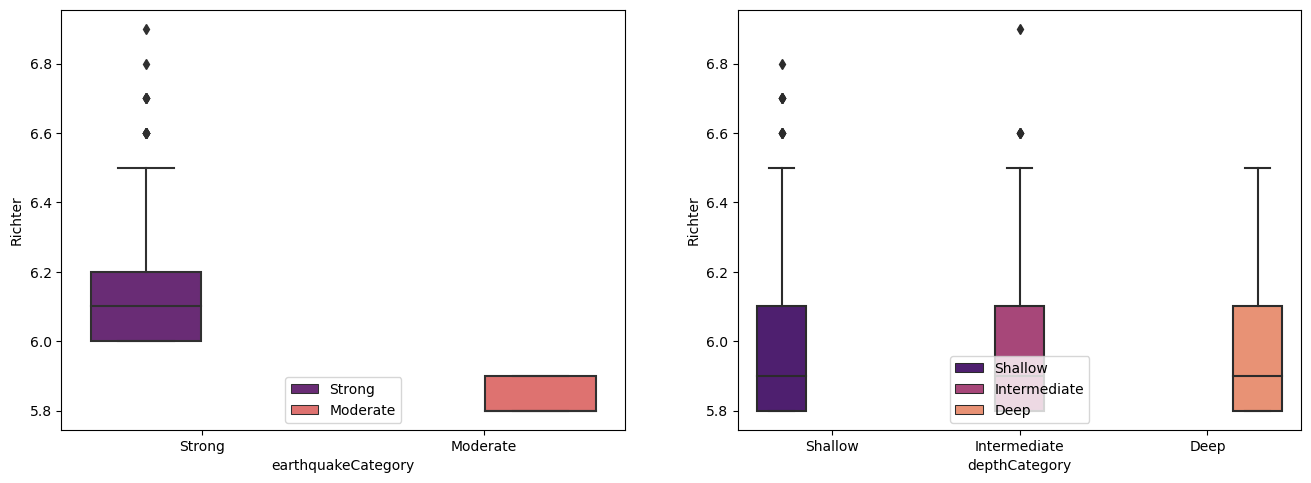

In [ ]:
tempList = ['earthquakeCategory', 'depthCategory']
subplot = 1
plt.figure(figsize = (16,12))
for i in tempList:
    plt.subplot(2,2,subplot)
    sns.boxplot(data = df, y = 'Richter', x = i, hue = i, palette = 'magma')
    plt.legend(loc=8)
    subplot = subplot + 1
plt.show()

Now I will make dummies of categorical features and use them in clustering models.

In [ ]:
df= pd.get_dummies(df, columns=['earthquakeCategory', 'depthCategory','Area'])

#### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
tempDf = df
ms = StandardScaler()
tempDf_scale = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf_scale,columns=df.columns)
tempDf.head()

Focal depth  Latitude  Longitude   Richter  earthquakeCategory_Moderate  \
0    -0.392935 -1.983298  -0.222612  3.868402                    -1.127612   
1    -0.367674  1.357570   0.790593 -0.937747                     0.886830   
2    -0.190841  1.231848   0.723256 -0.937747                     0.886830   
3    -0.106635  0.799335   0.709788  1.198320                    -1.127612   
4    -0.418197 -0.937889   0.946585  0.130286                    -1.127612   

   earthquakeCategory_Strong  depthCategory_Deep  depthCategory_Intermediate  \
0                   1.127612           -0.250457                   -0.498001   
1                  -0.886830           -0.250457                   -0.498001   
2                  -0.886830           -0.250457                   -0.498001   
3                   1.127612           -0.250457                   -0.498001   
4                   1.127612           -0.250457                   -0.498001   

   depthCategory_Shallow  Area_Mid Atlantic Ring  Area_Mid Continental  \
0               0.589279               -0.210168              2.779446   
1               0.589279               -0.210168             -0.359784   
2               0.589279               -0.210168             -0.359784   
3               0.589279               -0.210168             -0.359784   
4               0.589279               -0.210168             -0.359784   

   Area_Pacific Ring of Fire  
0                  -2.317982  
1                   0.431410  
2                   0.431410  
3                   0.431410  
4                   0.431410

In [ ]:
del df['Latitude']

In [ ]:
del df['Longitude']

### K-means with 15 clusters

Building kmeans with 15 clusters.

Clustering:

In [ ]:
kmeans = KMeans(n_clusters=15,  n_init=50, random_state=0)

kmeans.fit(tempDf)

KMeans(n_clusters=15, n_init=50, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 0.42091884, -0.25074977,  0.09298314,  0.89363521, -1.1276118 ,
         1.1276118 , -0.25045698,  2.00802844, -1.6969888 , -0.21016783,
        -0.35978389,  0.43140973],
       [-0.40301559, -0.95621984, -1.43985541, -0.70776881,  0.88683002,
        -0.88683002, -0.25045698, -0.49800091,  0.58927908, -0.21016783,
        -0.35978389,  0.43140973],
       [-0.36303619,  0.19606789,  0.73622005,  0.91970217, -1.1276118 ,
         1.1276118 , -0.25045698, -0.49800091,  0.58927908, -0.21016783,
        -0.35978389,  0.43140973],
       [-0.36174093, -0.45879047,  0.74671683, -0.69501194,  0.88683002,
        -0.88683002, -0.25045698, -0.49800091,  0.58927908, -0.21016783,
        -0.35978389,  0.43140973],
       [ 3.57398034, -0.19068256,  0.09833398,  0.78753754, -1.1276118 ,
         1.1276118 ,  3.99270168, -0.49800091, -1.6969888 , -0.21016783,
        -0.29941407,  0.37853681],
       [-0.43928605,  0.37133988,  0.120052  , -0.70145623,  0.88683002,
        -0.88683002, -

In [ ]:
kmeans.inertia_

3040.0996912125743

In [ ]:
labels = kmeans.labels_
df['labels']=labels

## PCA

The results of this work indicate that the PCA methods were able to improve the performance of K-Means, so I decide to use pca in combination with kmeans.So, before kmeans i will do PCA.

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(tempDf_scale)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.components_

array([[ 1.03237775e-01,  1.05897115e-02, -2.77771336e-02,
         5.32747900e-01, -5.79671803e-01,  5.79671803e-01,
         7.49785650e-02,  8.55195234e-02, -1.18419457e-01,
        -2.46804752e-02, -4.60286306e-02,  5.39705984e-02],
       [ 5.28251870e-01, -1.33648372e-01,  2.12731336e-03,
        -1.14401443e-01,  1.18403776e-01, -1.18403776e-01,
         4.35948937e-01,  3.11968253e-01, -5.19505626e-01,
        -9.22801200e-02, -2.06193375e-01,  2.31654614e-01],
       [ 1.35793951e-01, -6.57593213e-02, -5.08256324e-02,
        -6.11646838e-03, -6.10191348e-03,  6.10191348e-03,
         8.03507093e-02,  2.08385902e-01, -2.33405881e-01,
         3.27458069e-01,  5.59221132e-01, -6.70987559e-01],
       [ 3.29950234e-01,  3.48419611e-01,  7.20881635e-02,
         4.65382219e-03, -8.81496671e-03,  8.81496671e-03,
         5.17578980e-01, -5.70323203e-01,  2.41431655e-01,
        -2.23416429e-01,  2.36659149e-01, -8.36336912e-02],
       [ 9.46269035e-02, -4.60614589e-01, -4.7901310

In [ ]:
pca.explained_variance_ratio_

array([2.28754814e-01, 2.20045634e-01, 1.54794960e-01, 1.20212811e-01,
       1.15864805e-01, 7.32401307e-02, 6.09096006e-02, 2.20304996e-02,
       4.14674498e-03, 5.75589573e-35, 8.89503744e-36, 4.11587081e-62])

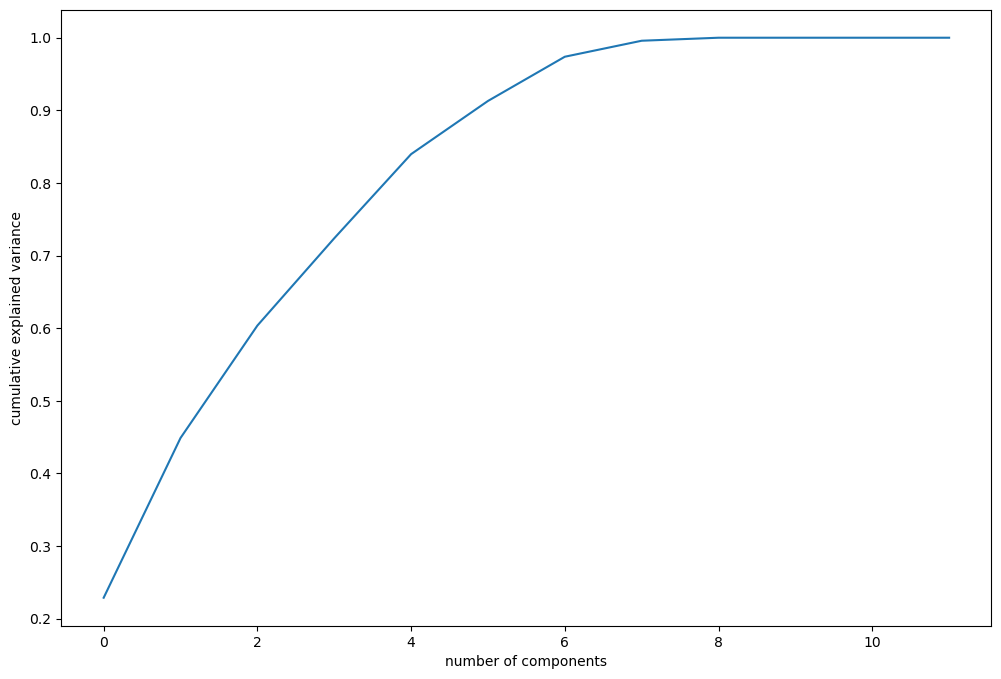

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In this case, to get 80% of variance explained I need 3 principal components. I will choose 3 for n components.

In [ ]:
pca_final = IncrementalPCA(n_components=3)

In [ ]:
df_pca = pca_final.fit_transform(tempDf_scale)

In [ ]:
pc = np.transpose(df_pca)

In [ ]:
corrmat = np.corrcoef(pc)

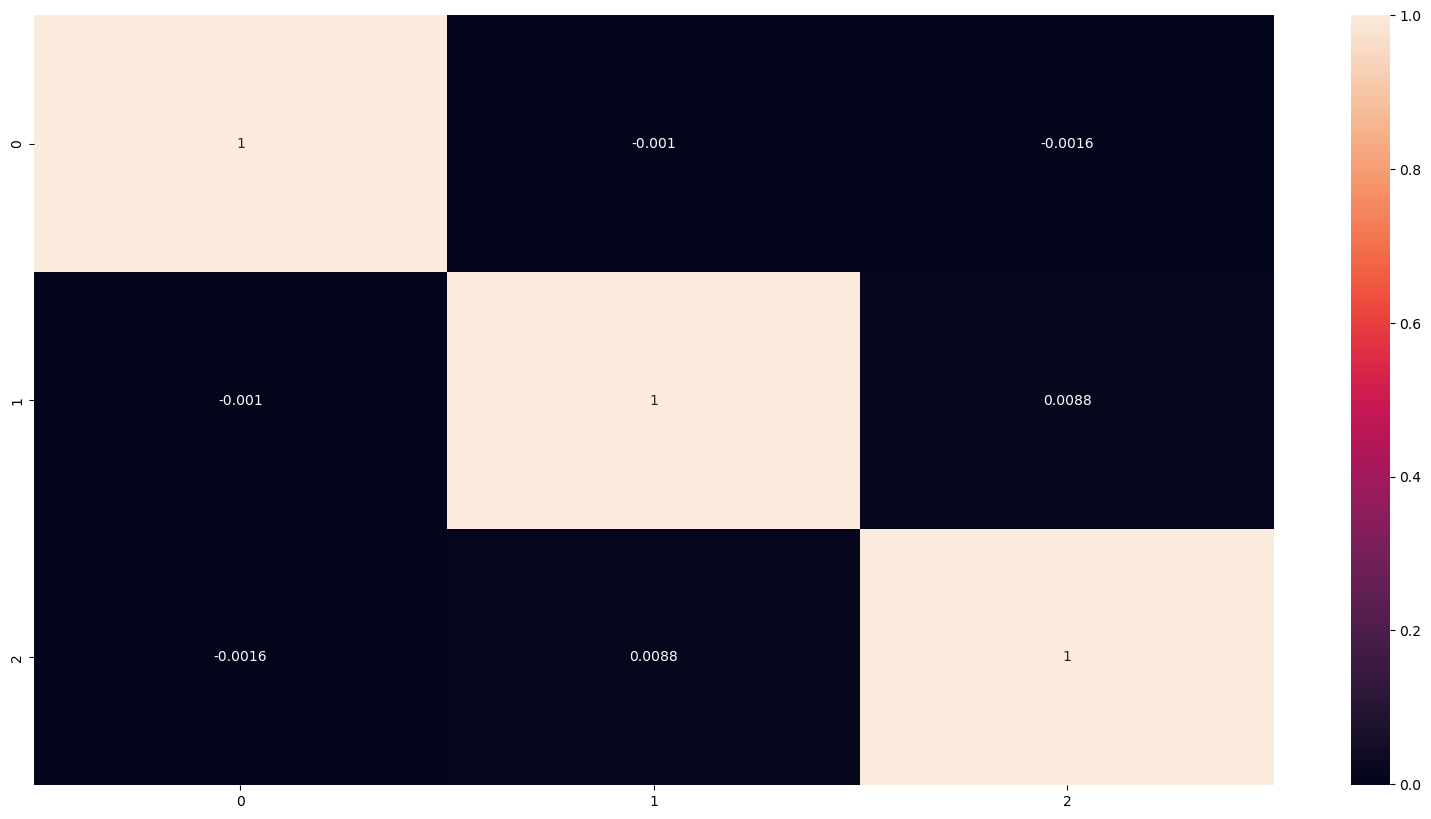

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [ ]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [ ]:
colss=pcs_df2[['PC1','PC2','PC3']]

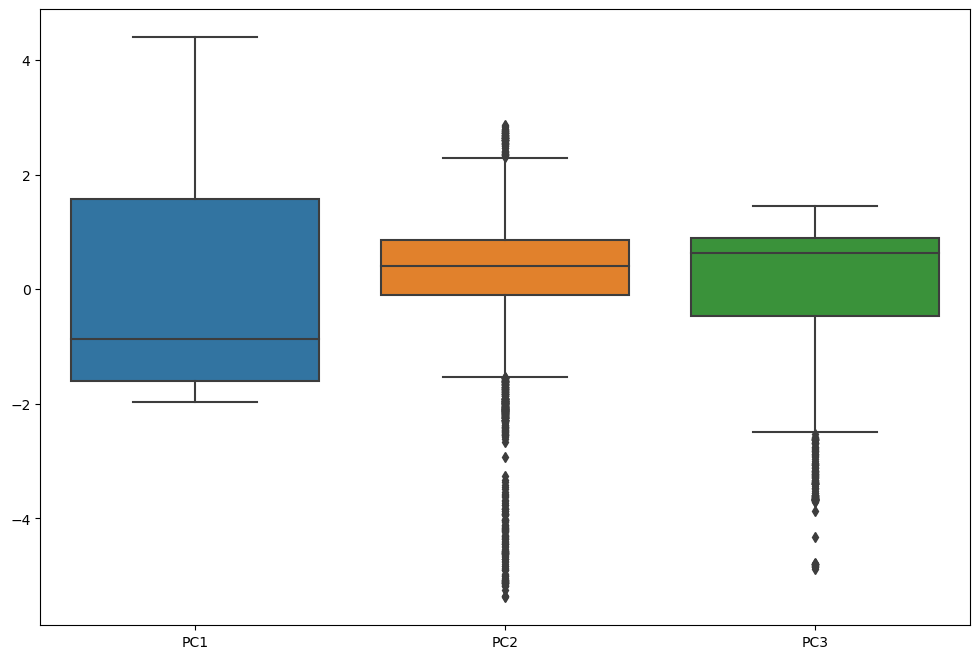

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [ ]:
pcs_df2.shape

(2033, 3)

In [ ]:
pcs_df2

PC1       PC2       PC3
0     3.022503  2.364125 -2.822292
1    -1.636392  0.505183  1.232111
2    -1.623729  0.393832  1.175449
3     1.875711  0.859491  1.039406
4     1.259228  0.600447  0.684858
...        ...       ...       ...
2028 -1.622358  0.653469  1.114653
2029 -0.866806 -2.033114 -0.372157
2030 -0.904745 -4.582546 -0.278396
2031  1.292876  0.872124  1.108784
2032 -1.637628  0.352147  1.038335

[2033 rows x 3 columns]

In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
hopkins(pcs_df2)

0.9647611662382325

In [ ]:
pcs_df2.shape

(2033, 3)

In [ ]:
dat3_1 = pcs_df2

### KMEANS

Now, I will do the k means using the final table obtained using the pca method (dat3_1).

In [ ]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

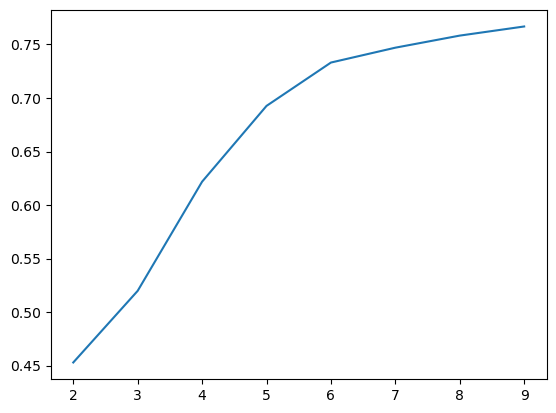

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

I will use elbow method to find optimal clusters number. The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering.

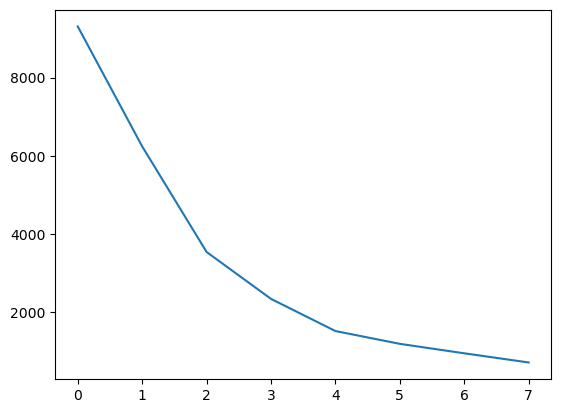

In [ ]:
ssd = []
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

Also I will do silhouette analyze and choose the number of clusters for which silhouette score is the best.

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45297678449850315
For n_clusters=3, the silhouette score is 0.5200165025594564
For n_clusters=4, the silhouette score is 0.6218440868508712
For n_clusters=5, the silhouette score is 0.6926246768287486
For n_clusters=6, the silhouette score is 0.733115430082973
For n_clusters=7, the silhouette score is 0.7469998247523766
For n_clusters=8, the silhouette score is 0.7582839643528946
For n_clusters=9, the silhouette score is 0.7668051414564087
For n_clusters=10, the silhouette score is 0.7685608590029248
For n_clusters=11, the silhouette score is 0.6926091971533752
For n_clusters=12, the silhouette score is 0.5697679131996799
For n_clusters=13, the silhouette score is 0.5614399612783854
For n_clusters=14, the silhouette score is 0.5509907182797229
For n_clusters=15, the silhouette score is 0.5420892031804633


From this I conclude that the score for eight clusters is the best. I make the k means algorithm for 10 clusters.

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=20, max_iter=500).fit(dat3_1)

In [ ]:
kmeans.cluster_centers_

array([[ 1.75104191,  0.54254233, -3.66758675],
       [-1.51745916,  0.30063277,  0.87899722],
       [ 1.70970999,  0.85556092,  0.86172162],
       [-1.00011456, -2.12011144, -0.39798333],
       [-1.51920738, -0.0982988 , -3.80238913],
       [ 2.20945797, -1.60629825, -0.42156188],
       [-0.79866301, -4.67046814, -0.56390124],
       [-1.7756178 ,  1.93070293, -2.33691482],
       [ 2.34985559, -4.10244735, -0.53966261],
       [ 1.39134572,  2.46549509, -2.36588724]])

In [ ]:
kmeans.inertia_

564.7682595150586

In [ ]:
labels = kmeans.labels_
df['labels_kmeans']=labels
data_visualisation['labels_kmeans']=labels

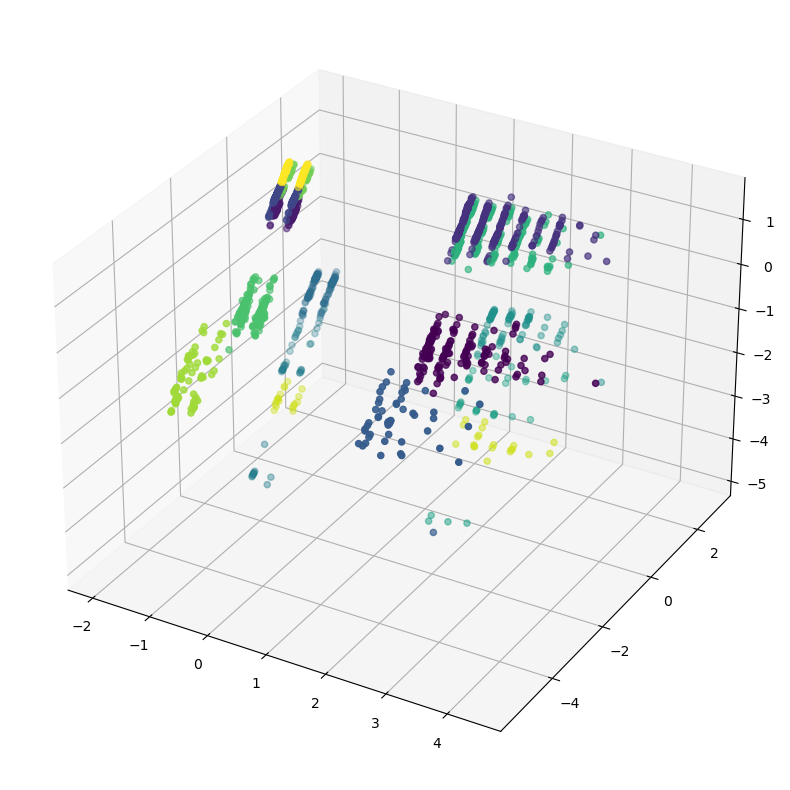

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(pcs_df2['PC1'], pcs_df2['PC2'], pcs_df2['PC3'], c=df['labels'])
plt.show()

Metrics variables:

In [ ]:
rand_metric = []
adj_rand_metric = []
model = []

## DBSCAN + PCA

In [ ]:
X = dat3_1[['PC1','PC2','PC3']]

In [ ]:
y=df['labels_kmeans']

In [ ]:
nn = NearestNeighbors(n_neighbors=20).fit(dat3_1)
distances, indices = nn.kneighbors(dat3_1)

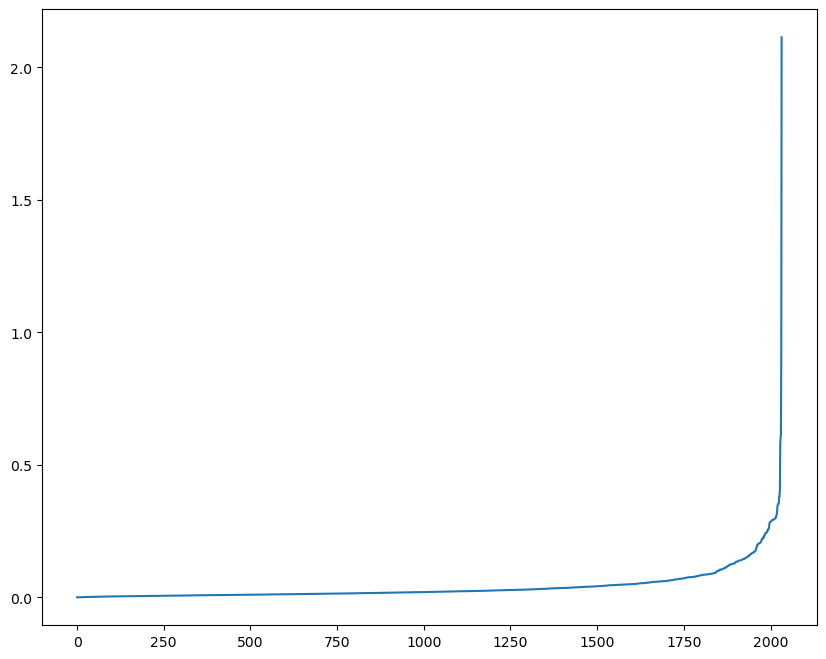

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

Researching the best parameters:

In [ ]:
min_samples = range(5,21)
eps = np.arange(0.05,0.5, 0.01)

In [ ]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(dat3_1).labels_
        score = silhouette_score(dat3_1, labels)
        output.append((ms, ep, score))

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.7606714909774448
min_samples: 5
eps: 0.49000000000000005


In [ ]:
labels = DBSCAN(min_samples=min_samples, eps=eps).fit(dat3_1).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(dat3_1, labels)}")

Number of clusters: 12
Number of outliers: 14
Silhouette_score: 0.7606714909774448


In [ ]:
data_visualisation["labels_dbscan"]=labels

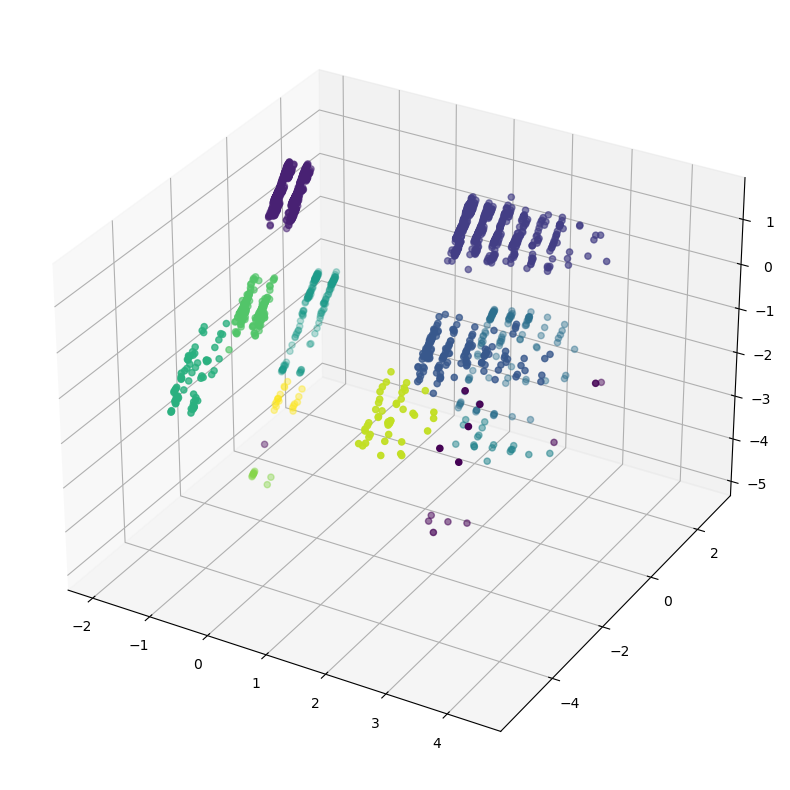

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(pcs_df2['PC1'], pcs_df2['PC2'], pcs_df2['PC3'], c=labels)
plt.show()

Task was to estimate quality of cluster i built (as ground truth i have to use cluster labels from k means) so i will use rand metric and adj rand metric.

In [ ]:
# check how many of the samples were correctly labeled
dbs_rand_metric = metrics.rand_score(y, labels)
dbs_adj_rand_metric = metrics.adjusted_rand_score(y, labels)

In [ ]:
dbs_rand_metric

0.9970937213148405

In [ ]:
dbs_adj_rand_metric

0.9913875044727914

Perfectly matching labelings have a score of 1, so i can conlude that this is good matching between dbscan and kmeans.

In [ ]:
rand_metric.append(dbs_rand_metric)
adj_rand_metric.append(dbs_adj_rand_metric)
model.append("DBSCAN + PCA")

## Agglomerative + PCA

In [ ]:
def train_Agglomerative(linkage,k,X):
    agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
    y_pred = agglo_model.fit_predict(X)
    print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

In [ ]:
clusters=[3,4,5,6,7,8,9,10]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
    for i in clusters:
        train_Agglomerative(lin,i,dat3_1)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.48710361611003933
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.6234755359976246
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.692251379695228
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.732774983342657
Agglomerative Clustering : clusters :  7  linkage :  ward  silhouette_score :  0.7466879126725973
Agglomerative Clustering : clusters :  8  linkage :  ward  silhouette_score :  0.7581931726220569
Agglomerative Clustering : clusters :  9  linkage :  ward  silhouette_score :  0.7649611618969098
Agglomerative Clustering : clusters :  10  linkage :  ward  silhouette_score :  0.7675024143298695
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.4325897530775408
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.4325959882153326
Agglomerativ

In [ ]:
agglo_model = AgglomerativeClustering(linkage="ward" ,n_clusters=10)
y_pred = agglo_model.fit_predict(dat3_1)
labels = agglo_model.labels_
data_visualisation['labels_agglo']=labels

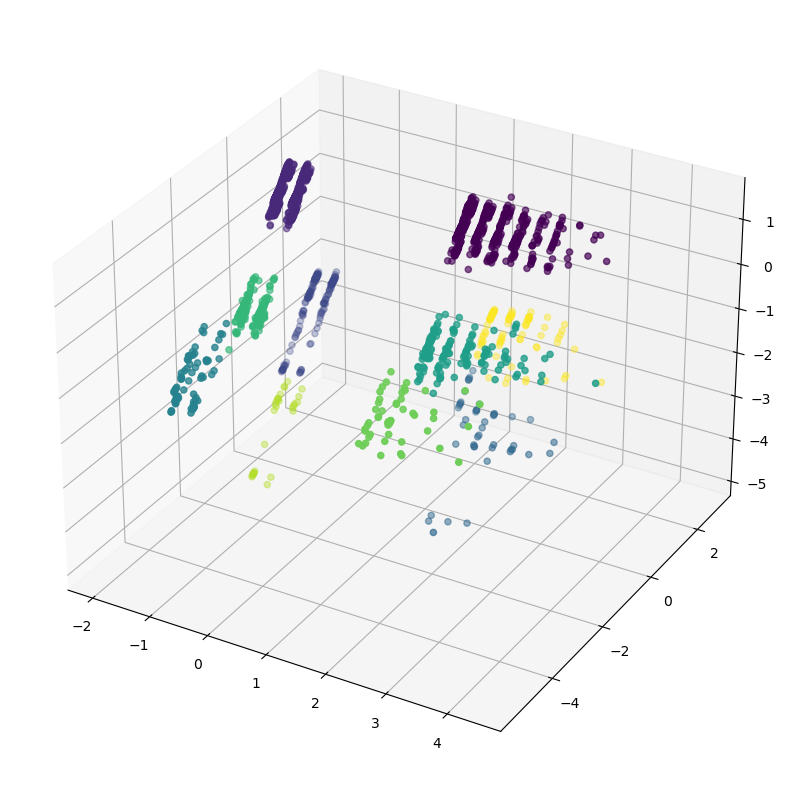

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(pcs_df2['PC1'], pcs_df2['PC2'], pcs_df2['PC3'], c=labels)
plt.show()

In [ ]:
# check how many of the samples were correctly labeled
agg_rand_metric = metrics.rand_score(y, labels)
agg_adj_rand_metric = metrics.adjusted_rand_score(y, labels)

In [ ]:
agg_rand_metric

0.9981946504719375

In [ ]:
agg_adj_rand_metric

0.994646928783294

In [ ]:
rand_metric.append(agg_rand_metric)
adj_rand_metric.append(agg_adj_rand_metric)
model.append("Agglomerative + PCA")

### Spectral Clustering + PCA

In [ ]:
def train_spectral(k,X):
    spectral_model = SpectralClustering(n_clusters=k)
    y_pred = spectral_model.fit_predict(dat3_1)
    print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(dat3_1,y_pred) )

In [ ]:
clusters=range(3, 15)
for i in clusters:
    train_spectral(i, X)

Spectral Clustering : clusters :  3  silhouette_score :  0.5375115483619849
Spectral Clustering : clusters :  4  silhouette_score :  0.5664526317421593
Spectral Clustering : clusters :  5  silhouette_score :  0.662027881224284
Spectral Clustering : clusters :  6  silhouette_score :  0.732774983342657
Spectral Clustering : clusters :  7  silhouette_score :  0.7465646477438368
Spectral Clustering : clusters :  8  silhouette_score :  0.7580632729973604
Spectral Clustering : clusters :  9  silhouette_score :  0.47353759179044436
Spectral Clustering : clusters :  10  silhouette_score :  0.47938603274774
Spectral Clustering : clusters :  11  silhouette_score :  0.47747745482403803
Spectral Clustering : clusters :  12  silhouette_score :  0.47619925556183235
Spectral Clustering : clusters :  13  silhouette_score :  0.7654959758303185
Spectral Clustering : clusters :  14  silhouette_score :  0.7661955800493792


In [ ]:
spectral_model = SpectralClustering(n_clusters=8)
y_pred = spectral_model.fit_predict(dat3_1)
labels = spectral_model.labels_

In [ ]:
data_visualisation['label_spectral']=labels

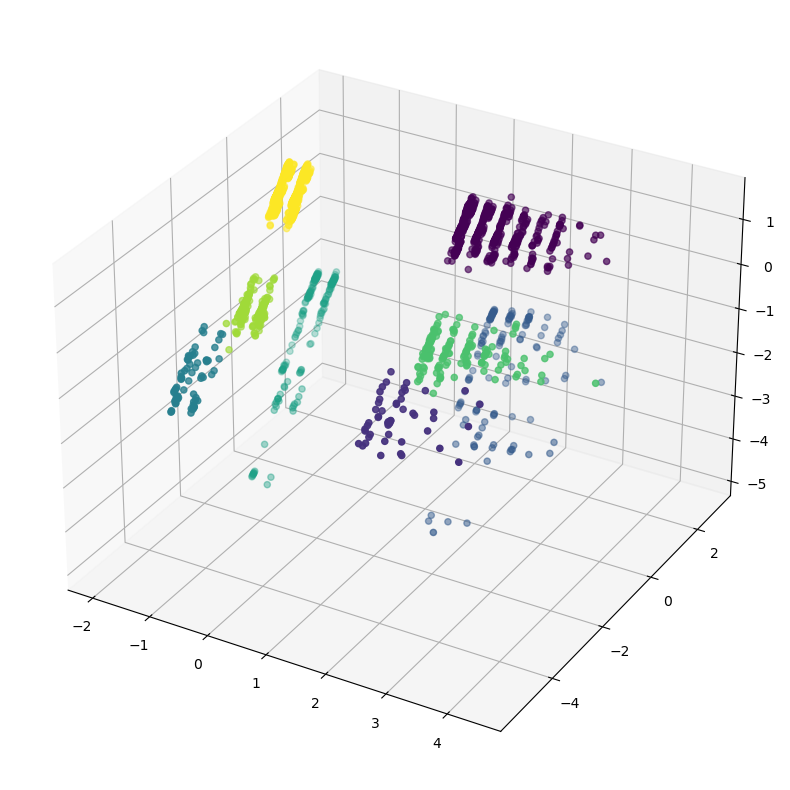

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(pcs_df2['PC1'], pcs_df2['PC2'], pcs_df2['PC3'], c=labels)
plt.show()

In [ ]:
# check how many of the samples were correctly labeled
sp_rand_metric = metrics.rand_score(y, labels)
sp_adj_rand_metric = metrics.adjusted_rand_score(y, labels)

In [ ]:
sp_rand_metric

0.994796972009094

In [ ]:
sp_adj_rand_metric

0.9846847612650867

In [ ]:
rand_metric.append(sp_rand_metric)
adj_rand_metric.append(sp_adj_rand_metric)
model.append("Spectral Clustering + PCA")

## Visualisation

In [ ]:
def get_marker_color(labels):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if labels == 0:
        return ('o')
    elif labels ==1 :
        return ('o')
    elif labels ==2 :
        return ('o')
    elif labels ==3 :
        return ('o')
    elif labels ==4 :
        return ('o')
    elif labels ==5 :
        return ('o')
    elif labels ==6 :
        return ('o')
    elif labels ==7 :
        return ('o')
    elif labels ==8 :
        return ('o')
    elif labels ==9 :
        return ('o')

In [ ]:
def get_marker_color(labels):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    return ('o')


def plot_labels(data_visualisation, label):
    # Create empty lists for the data we are interested in.

    longitudes = data_visualisation["Longitude"].tolist()
    latitudes = data_visualisation["Latitude"].tolist()
    labels = data_visualisation[label].tolist()

    m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

    fig = plt.figure(figsize=(10,8))
    plt.title(label)
    m.drawcoastlines()
    m.fillcontinents(color='silver',lake_color='aqua')
    m.drawmapboundary(fill_color='lightblue')
    m.drawcountries()
    m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
    # draw meridians
    m.drawmeridians(np.arange(0,360,20),labels=[1,1,0,1])
    min_marker_size = 2.5
    for lon, lat, lab in zip(longitudes, latitudes, labels):
        x,y = m(lon, lat)
        msize = lab * min_marker_size
        marker_string = get_marker_color(lab)
        m.plot(x, y, marker_string, markersize=3)
    plt.show()

In [ ]:
# Define a function to color max value in Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
evaluation = pd.DataFrame()

In [ ]:
evaluation["model"] = model
evaluation["rand_metric"] = rand_metric
evaluation["adj_rand_metric"] = adj_rand_metric

In [ ]:
rand_metric.append(sp_rand_metric)
adj_rand_metric.append(sp_adj_rand_metric)
model.append("Spectral Clustering + PCA")

In [ ]:
evaluation = evaluation.style.apply(highlight_max, subset=['rand_metric', 'adj_rand_metric'])
evaluation

I can conclude that the clusters of Agglomerative+PLC and KMEANS models are very similar. I created visualizations for every model.

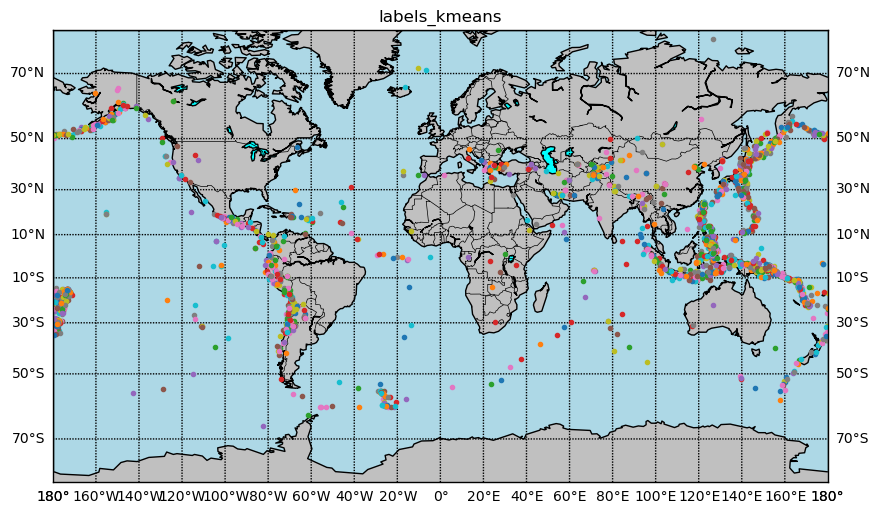

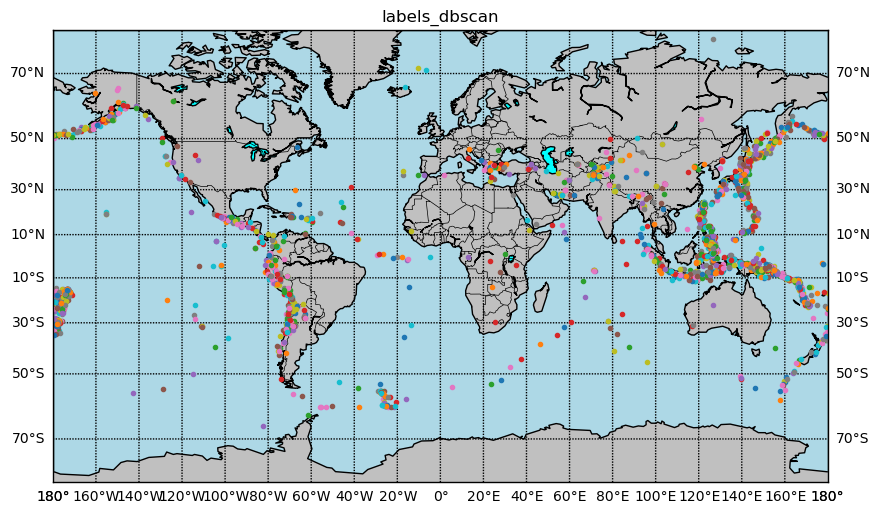

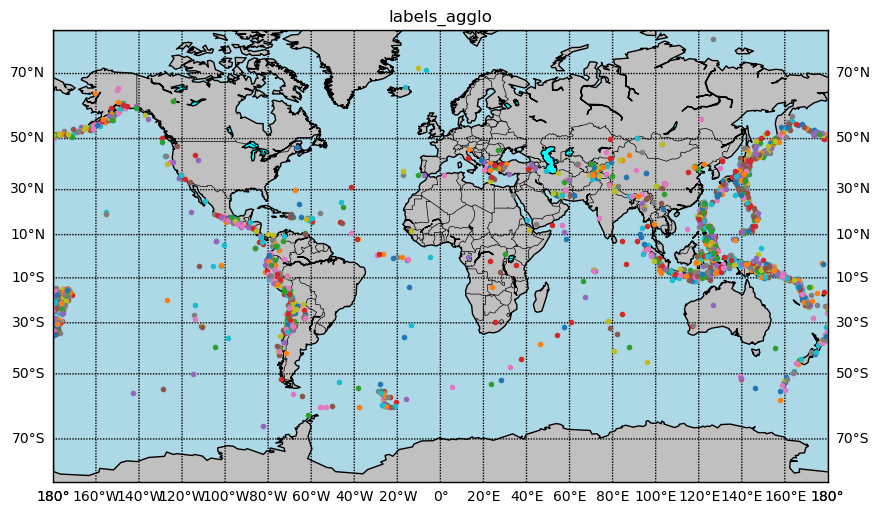

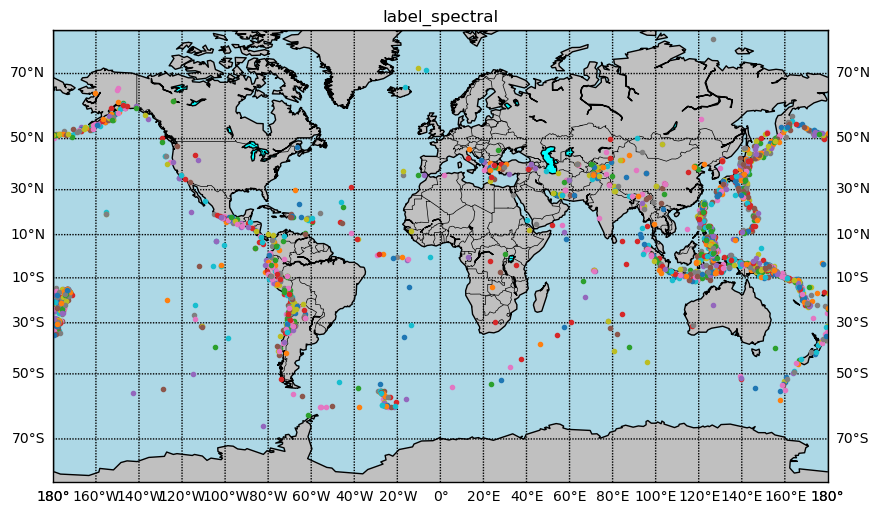

In [ ]:
for label in ["labels_kmeans", "labels_dbscan", "labels_agglo", "label_spectral"]:
    plot_labels(data_visualisation, label)